In [7]:
import matplotlib
import matplotlib.pyplot as plt

from datasets import get_dataset

import numpy as np
np.random.seed(123)

import random
random.seed(123)

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

from keras.utils import plot_model
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout, Reshape
from keras.optimizers import Adadelta, SGD
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import label_binarize
import pdb
import progressbar
import os
from scipy import stats
from sklearn.metrics import accuracy_score

In [8]:
n_views = 5
dataset = 'tic-tac-toe'

In [45]:
# Algorithm:
# Input: L, U, Learn
# Output: H
# 1. Partition L into (v_1, v_2, ..., v_n)
# 2. Learn h_i on v_i using Learn
# 3. while (one of h_i changes):
# 	3.1 Q = []
# 	3.2 for i in range(n):
#         if majority on classifiers other than h_i has better accuracy on L: 
#             for u in U:
#                 if more than 50% of classifiers other than h_i agree on u:
#                     Q_i = Q_i Union {u, prediction(u)}
# 	3.3 for i in range(n):
#           Learn h_i on L Union q_i
# 4. Output H = Majority Over h_i

In [9]:
# 1. Partition L into (v_1, v_2, ..., v_n)
ds = get_dataset(dataset, 0.7, 0.25)
[L_x, L_y], U, [test_x, test_y] = ds.get_data()
V = []
for ind in range(n_views):
    left = int(ind * L_x.shape[0] / n_views)
    right = int((ind+1) * L_x.shape[0] / n_views)
    V.append([L_x[left:right], L_y[left:right]])

In [10]:
# 2. Learn h_i on v_i using Learn
H = []
n_attr = V[ind][0].shape[1]

for ind in range(n_views):
    h = Sequential()
    h.add(Dense(input_shape=(n_attr,), units=n_attr / 2))
    h.add(Activation('relu'))
    h.add(BatchNormalization())
    h.add(Dense(units=n_attr/5))
    h.add(Activation('relu'))
    h.add(BatchNormalization())
    h.add(Dropout(0.5))
    h.add(Dense(units=V[ind][1].shape[1]))
    h.add(Activation('softmax'))
    h.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])
    H.append(h)

for ind in range(n_views):
    H[ind].fit(V[ind][0], V[ind][1], epochs=50, batch_size=32, validation_split=0.2, verbose=True)
    print H[ind].evaluate(test_x,test_y)

Train on 34 samples, validate on 9 samples
Epoch 1/50
34/34 [==============================] - 81s 2s/step - loss: 1.0240 - acc: 0.6765 - val_loss: 0.6889 - val_acc: 0.8889
Epoch 2/50
34/34 [==============================] - 0s 258us/step - loss: 1.2812 - acc: 0.6471 - val_loss: 0.6855 - val_acc: 0.8889
Epoch 3/50
34/34 [==============================] - 0s 242us/step - loss: 1.4379 - acc: 0.5882 - val_loss: 0.6818 - val_acc: 0.8889
Epoch 4/50
34/34 [==============================] - 0s 295us/step - loss: 1.1160 - acc: 0.7353 - val_loss: 0.6789 - val_acc: 0.8889
Epoch 5/50
34/34 [==============================] - 0s 384us/step - loss: 1.4259 - acc: 0.6471 - val_loss: 0.6751 - val_acc: 0.8889
Epoch 6/50
34/34 [==============================] - 0s 454us/step - loss: 1.0959 - acc: 0.7353 - val_loss: 0.6720 - val_acc: 0.8889
Epoch 7/50
34/34 [==============================] - 0s 274us/step - loss: 0.9250 - acc: 0.6471 - val_loss: 0.6680 - val_acc: 0.8889
Epoch 8/50
34/34 [=================

34/34 [==============================] - 0s 333us/step - loss: 0.7237 - acc: 0.6471 - val_loss: 0.9056 - val_acc: 0.3333
Epoch 12/50
34/34 [==============================] - 0s 352us/step - loss: 0.7421 - acc: 0.6176 - val_loss: 0.8989 - val_acc: 0.3333
Epoch 13/50
34/34 [==============================] - 0s 304us/step - loss: 0.8114 - acc: 0.5588 - val_loss: 0.8937 - val_acc: 0.3333
Epoch 14/50
34/34 [==============================] - 0s 346us/step - loss: 0.8544 - acc: 0.6471 - val_loss: 0.8892 - val_acc: 0.3333
Epoch 15/50
34/34 [==============================] - 0s 379us/step - loss: 0.8157 - acc: 0.5000 - val_loss: 0.8860 - val_acc: 0.3333
Epoch 16/50
34/34 [==============================] - 0s 315us/step - loss: 0.7533 - acc: 0.6176 - val_loss: 0.8803 - val_acc: 0.3333
Epoch 17/50
34/34 [==============================] - 0s 365us/step - loss: 0.8801 - acc: 0.4412 - val_loss: 0.8749 - val_acc: 0.3333
Epoch 18/50
34/34 [==============================] - 0s 349us/step - loss: 0.7911

34/34 [==============================] - 0s 452us/step - loss: 0.7248 - acc: 0.5588 - val_loss: 0.6963 - val_acc: 0.5556
Epoch 22/50
34/34 [==============================] - 0s 312us/step - loss: 0.6555 - acc: 0.6176 - val_loss: 0.6972 - val_acc: 0.5556
Epoch 23/50
34/34 [==============================] - 0s 320us/step - loss: 0.7860 - acc: 0.4412 - val_loss: 0.6976 - val_acc: 0.5556
Epoch 24/50
34/34 [==============================] - 0s 318us/step - loss: 0.6822 - acc: 0.5000 - val_loss: 0.6980 - val_acc: 0.5556
Epoch 25/50
34/34 [==============================] - 0s 443us/step - loss: 0.7616 - acc: 0.5588 - val_loss: 0.6985 - val_acc: 0.5556
Epoch 26/50
34/34 [==============================] - 0s 385us/step - loss: 0.7393 - acc: 0.4706 - val_loss: 0.6988 - val_acc: 0.5556
Epoch 27/50
34/34 [==============================] - 0s 458us/step - loss: 0.7429 - acc: 0.5882 - val_loss: 0.6995 - val_acc: 0.5556
Epoch 28/50
34/34 [==============================] - 0s 338us/step - loss: 0.6694

34/34 [==============================] - 0s 331us/step - loss: 0.9058 - acc: 0.4118 - val_loss: 0.6665 - val_acc: 0.5556
Epoch 32/50
34/34 [==============================] - 0s 380us/step - loss: 0.7946 - acc: 0.4706 - val_loss: 0.6680 - val_acc: 0.5556
Epoch 33/50
34/34 [==============================] - 0s 372us/step - loss: 0.8281 - acc: 0.5000 - val_loss: 0.6679 - val_acc: 0.5556
Epoch 34/50
34/34 [==============================] - 0s 339us/step - loss: 0.7399 - acc: 0.5294 - val_loss: 0.6684 - val_acc: 0.5556
Epoch 35/50
34/34 [==============================] - 0s 376us/step - loss: 0.7490 - acc: 0.5294 - val_loss: 0.6696 - val_acc: 0.5556
Epoch 36/50
34/34 [==============================] - 0s 361us/step - loss: 0.8038 - acc: 0.4706 - val_loss: 0.6702 - val_acc: 0.5556
Epoch 37/50
34/34 [==============================] - 0s 378us/step - loss: 0.7297 - acc: 0.5588 - val_loss: 0.6697 - val_acc: 0.5556
Epoch 38/50
34/34 [==============================] - 0s 326us/step - loss: 0.7895

35/35 [==============================] - 0s 377us/step - loss: 0.6794 - acc: 0.5714 - val_loss: 0.7099 - val_acc: 0.5556
Epoch 42/50
35/35 [==============================] - 0s 381us/step - loss: 0.7041 - acc: 0.6000 - val_loss: 0.7093 - val_acc: 0.5556
Epoch 43/50
35/35 [==============================] - 0s 353us/step - loss: 0.7152 - acc: 0.4857 - val_loss: 0.7094 - val_acc: 0.5556
Epoch 44/50
35/35 [==============================] - 0s 344us/step - loss: 0.7271 - acc: 0.4571 - val_loss: 0.7085 - val_acc: 0.4444
Epoch 45/50
35/35 [==============================] - 0s 382us/step - loss: 0.6952 - acc: 0.5714 - val_loss: 0.7079 - val_acc: 0.4444
Epoch 46/50
35/35 [==============================] - 0s 340us/step - loss: 0.6837 - acc: 0.6000 - val_loss: 0.7062 - val_acc: 0.4444
Epoch 47/50
35/35 [==============================] - 0s 355us/step - loss: 0.6818 - acc: 0.5714 - val_loss: 0.7060 - val_acc: 0.4444
Epoch 48/50
35/35 [==============================] - 0s 362us/step - loss: 0.7309

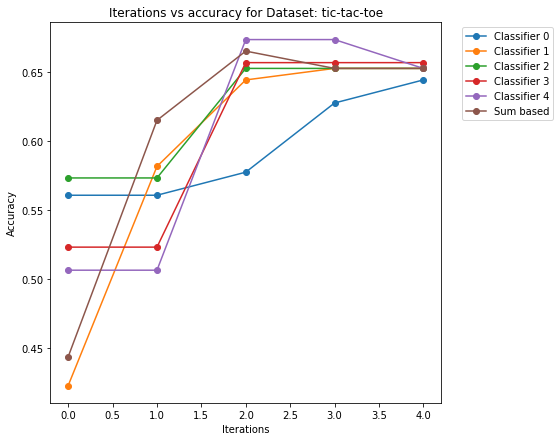

In [11]:
# 3
changed = True
to_plot = []
num_runs = 0
while (changed and num_runs <= 10):
    preds_L = []
    for ind in range(n_views):
        preds_L.append(H[ind].predict(L_x))
    preds_L = np.array(preds_L)
    
    preds_U = []
    for ind in range(n_views):
        preds_U.append(H[ind].predict(U))
    preds_U = np.array(preds_U)
    
    perfs = []
    test_preds = []
    for ind in range(n_views):
        test_preds.append(H[ind].predict(test_x))
    test_preds = np.array(test_preds)
    
    for ind in range(n_views):
        perf = accuracy_score(np.argmax(test_y, axis=1), np.argmax(test_preds[ind], axis=1))
        perfs.append(perf)
    perfs.append(accuracy_score(np.argmax(test_y, axis=1),
                                np.argmax(np.sum(test_preds, axis=0), axis=1)))
    to_plot.append(perfs)
    
    Q = []
    update = [False for _ in range(n_views)]
    for cur in range(n_views):
        elems_take = [view_ind for view_ind in range(n_views) if view_ind != cur]
        preds_others_L = preds_L[elems_take]
        preds_others_U = preds_U[elems_take]
        
        acc_others_L = accuracy_score(np.argmax(L_y, axis=1), 
                                      np.argmax(np.sum(preds_others_L, axis=0), axis=1))
        acc_cur_L = accuracy_score(np.argmax(L_y, axis=1), np.argmax(preds_L[cur], axis=1))
        q_cur = [[], []]
        if acc_others_L > acc_cur_L:
            update[cur] = True
            for u_ind in range(preds_U.shape[1]):
                sum_prediction = np.argmax(np.sum(preds_others_U[:, u_ind], axis=0))
                if np.sum(np.argmax(preds_others_U[:, u_ind], axis=1) == sum_prediction) >= 0.5 * (n_views - 1):
                    q_cur[0].append(U[u_ind])
                    label_temp = [0, 0]; label_temp[sum_prediction] = 1
                    q_cur[1].append(label_temp)
        Q.append([np.array(q_cur[0]), np.array(q_cur[1])])
    for cur in range(n_views):
        if update[cur]:
            comb_x = np.concatenate([L_x, Q[cur][0]], axis=0)
            comb_y = np.concatenate([L_y, Q[cur][1]], axis=0)
            H[cur].fit(comb_x, comb_y, epochs=20, batch_size=32, validation_split=0.2, verbose=False)
    
    preds_L_new = []
    for ind in range(n_views):
        preds_L_new.append(H[ind].predict(L_x))
    
    preds_U_new = []
    for ind in range(n_views):
        preds_U_new.append(H[ind].predict(U))
    
    preds_L_red = np.argmax(np.sum(np.array(preds_L),axis=0),axis=1)
    preds_L_new_red = np.argmax(np.sum(np.array(preds_L_new),axis=0),axis=1)
    preds_U_red = np.argmax(np.sum(np.array(preds_U),axis=0),axis=1)
    preds_U_new_red = np.argmax(np.sum(np.array(preds_U_new),axis=0),axis=1)
    same =  np.all(preds_L_red == preds_L_new_red) and  np.all(preds_U_red == preds_U_new_red)
    changed = not same
    num_runs += 1

plt.figure(figsize=(7, 7))
plt.clf()
handles = []
labels = []
for ind in range(n_views):
    ys = [x[ind] for x in to_plot]
    handle, = plt.plot(range(len(to_plot)), ys, marker='o', label = str(ind))
    handles.append(handle)
    labels.append('Classifier %d' % ind)
ys = [x[n_views] for x in to_plot]
handle, = plt.plot(range(len(to_plot)), ys, marker='o', label = 'Overall')
handles.append(handle)
labels.append('Sum based')

plt.legend(handles, labels, bbox_to_anchor=(1.04,1), loc="upper left")
# plt.legend(handles, labels)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Iterations vs accuracy for Dataset: %s' % dataset)
plt.show()